In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import glob
from collections import Counter 
import re
import jieba
import pdftotext

In [2]:
pdf_files = glob.glob('pdf/*')

word_occ = dict()
num_unique_words = np.zeros(len(pdf_files)+1)
wordlengths = np.zeros(len(pdf_files))
for i, pdf_file in enumerate(pdf_files, start=1):
    
    # read all text from PDF file
    with open(pdf_file, "rb") as f:
        text = '\n\n'.join(pdftotext.PDF(f))
    
    # strip out all space characters
    text = text.replace(' ', '')
    
    # segment text into words
    seg_list = jieba.lcut(text, cut_all=False)
    
    # remove all words that don't contain Chinese
    ch_only_seg_list = list()
    for j, seg in enumerate(seg_list):
        if re.search('[\u4e00-\u9FFF]', seg):
            ch_only_seg_list.append(seg)
    
    # wordlength of test
    wordlengths[i-1] = len(seg_list)
    
    # count occurrences of each word
    pdf_word_occ = Counter(ch_only_seg_list)
    
    # add word occurrences to totals
    for word, occ in pdf_word_occ.items():
        if word in word_occ.keys():
            # the word was on an earlier test PDF
            word_occ[word] += occ
        else:
            # the word hasn't been seen yet
            word_occ.update({word:occ})
            num_unique_words[i] += 1

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.890 seconds.
Prefix dict has been built succesfully.


In [3]:
# cumulative sum of unique words
total_unique_words = np.cumsum(num_unique_words)

# fraction words on each test that were new
frac_new = np.zeros(len(pdf_files)+1)
frac_new[0] = 100
frac_new[1:] = num_unique_words[1:]/wordlengths*100

In [4]:
print(wordlengths)
print(np.mean(wordlengths))
print(np.sum(wordlengths))

[11769. 11998. 11778. 11847.  6465. 11813. 11817. 11621.  7528. 11808.
 12080. 11956. 11712.  7470. 11890. 11841. 11902.  6477.  7552. 11931.
  7420.]
10508.333333333334
220675.0


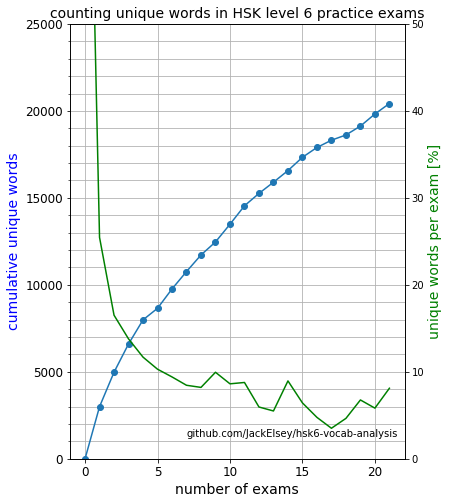

In [5]:
fig, ax = plt.subplots(figsize=(6,8))
ax.plot(np.arange(len(total_unique_words)), total_unique_words, marker='o')

ax2=ax.twinx()
ax2.plot(np.arange(len(total_unique_words)),frac_new, color='g')

ax.tick_params(axis='both', labelsize=12)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='both')
ax.set_title('counting unique words in HSK level 6 practice exams', fontsize=14)
ax.set_xlabel('number of exams', fontsize=14)
ax.set_ylabel('cumulative unique words', fontsize=14, color='b')
ax.set_ylim([0, 25000])
ax2.set_ylabel('unique words per exam [%]', fontsize=14, color='g')
ax2.set_ylim([0,50])
ax.text(7,1250,'github.com/JackElsey/hsk6-vocab-analysis')
plt.savefig('wordcount_plot', bbox_inches='tight')

In [6]:
# sort dictionary of words by occurrences
sorted_word_occ = {k: v for k, v in sorted(word_occ.items(), key=lambda item: item[1], reverse=True)}

# output text file of words and occurrences
with open('wordlist.csv', 'w') as outfile:
    for word, occ in sorted_word_occ.items():
        outfile.write(word+','+str(occ)+'\r\n')